# Analysis of Covid 19 in Ireland

This project will analyse the covid 19 in ireland. And, how affective the mesures taken were on help restrict the spead of the virus. 

The dataset downloaded from the world healt organization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import numpy as np
import sklearn.neighbors as nel
import sklearn.model_selection as mod

***
### Create an Overview of the entire data set, maybe a bar chart of all data collected over time.
***

In [2]:
# Plots styles.
plt.style.use('ggplot')

# Plot size.
plt.rcParams['figure.figsize'] = (14, 10)

## Get the dataset
The dataset is a sample of the report of a covid 19 report take from the world health orginisgion 
ref https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv
https://www.rte.ie/news/coronavirus/

In [4]:
#df = pd.read_csv('Covid19IrelandWeek.csv',index_col='Week')
#look at the dataset and fill all NaN's with 0
#df = df.fillna(0)

In [121]:
#get the dataset again without the index
#ddf1 = pd.read_csv('Covid19IrelandWeek.csv')
#ddf1 = ddf.fillna(0)

In [3]:
#WHO report
who = pd.read_csv('owid-covid-data.csv',index_col='date')
##look at the dataset and fill all NaN's with 0
who =who.fillna(0)

In [4]:
#whoE = who.loc[who['continent'] == 'Europe']
whoE = who.loc[who['iso_code'] =='IRL']
#ddf=whoE[['iso_code','continent','location','locklevel','total_cases','restrictions','new_cases','total_deaths','new_deaths','reproduction_rate','total_tests','new_tests','tests_per_case','hosp_patients','icu_patients']]
ddf=whoE[['iso_code','continent','location','locklevel','total_cases','new_cases','total_deaths','new_deaths','reproduction_rate','total_tests','new_tests','tests_per_case','hosp_patients','icu_patients']]
ddf
ddf

,iso_code,continent,location,locklevel,total_cases,new_cases,total_deaths,new_deaths,reproduction_rate,total_tests,new_tests,tests_per_case,hosp_patients,icu_patients
date,,,,,,,,,,,,,,
29/02/2020,IRL,Europe,Ireland,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/03/2020,IRL,Europe,Ireland,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02/03/2020,IRL,Europe,Ireland,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03/03/2020,IRL,Europe,Ireland,5.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04/03/2020,IRL,Europe,Ireland,5.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25/12/2020,IRL,Europe,Ireland,3.0,84098.0,1025.0,2194.0,2.0,0.0,2291729.0,21097.0,20.2,0.0,0.0
26/12/2020,IRL,Europe,Ireland,3.0,85394.0,1296.0,2200.0,6.0,0.0,2303659.0,11930.0,17.5,0.0,0.0
27/12/2020,IRL,Europe,Ireland,3.0,86129.0,735.0,2204.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


## Analysis 

### Data overview:

Creating functions

In [5]:
# mean, average and median function
def meanMedianMode(dataset,name):
    #mean = statistics.mean(dataset)
    mean = np.mean(dataset)
    #median = statistics.median(dataset)
    median = np.median(dataset)
    #mode = statistics.mode(dataset)
    mode = stats.mode(dataset)
    print( name.upper(),":\nThe mean is ",mean,"\nThe Mode is ",mode, "\nAnd median is ",median)
    

##### Total deaths vs total cases

This section discusses the total deaths, the total cases and the reproduction rate.  

Plotting the total deaths.

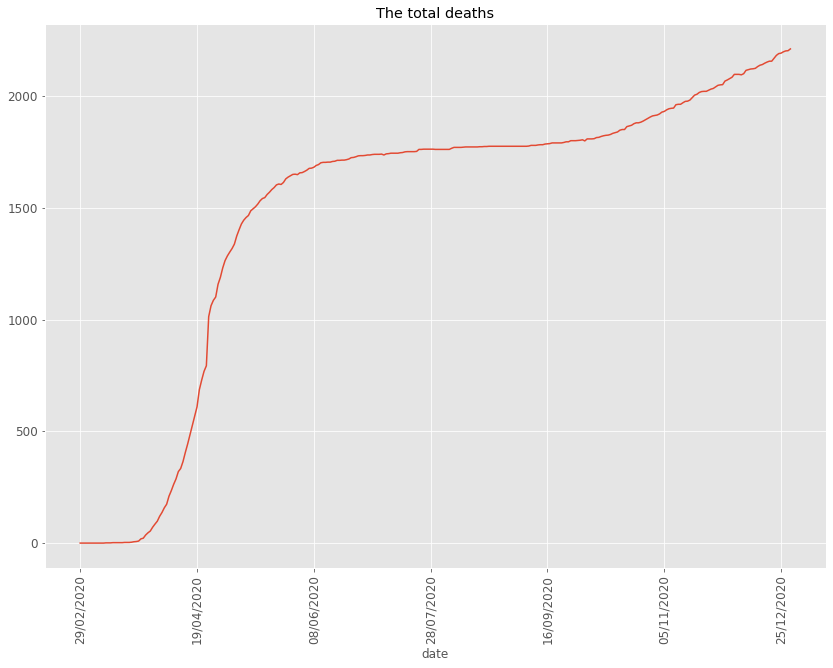

In [10]:
td= ddf['total_deaths']
my_plot=td.plot(rot=90,fontsize=12,title="The total deaths",grid=True)

The above figure show the total deaths over the period jan to end of November. The amount of people that have died in Ireland is approximatley 2100.

comparing that to other counties

In [7]:
whoE = who.loc[who['continent'] == 'Europe']
whotd=whoE['total_deaths']
whotd
#meanMedianMode(whotd,"Europe")
#who_Plot=whotd.plot(kind='bar',figsize=(15,10),rot=90,fontsize=12,title="compare the total deaths",grid=True)

date
09/03/2020    0.0
10/03/2020    0.0
11/03/2020    1.0
12/03/2020    1.0
13/03/2020    1.0
             ... 
25/12/2020    0.0
26/12/2020    0.0
27/12/2020    0.0
28/12/2020    0.0
29/12/2020    0.0
Name: total_deaths, Length: 14375, dtype: float64

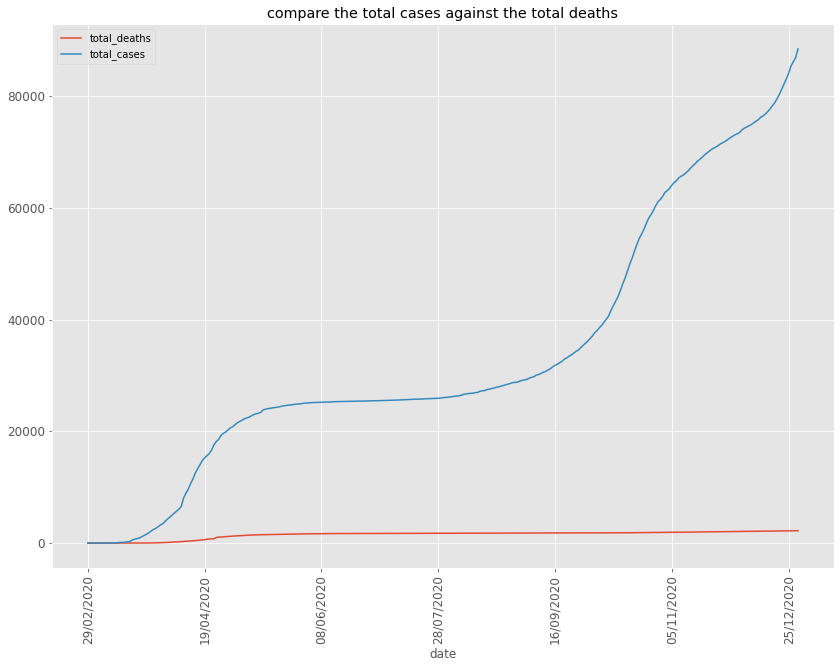

In [9]:
tdVsTc= ddf[['total_deaths','total_cases']]
my_plot=tdVsTc.plot(rot=90,fontsize=12,title="compare the total cases against the total deaths",grid=True)

The figure above show the total deaths vs the total cases. Even though there are many new cases the total deaths are not following the same trend.

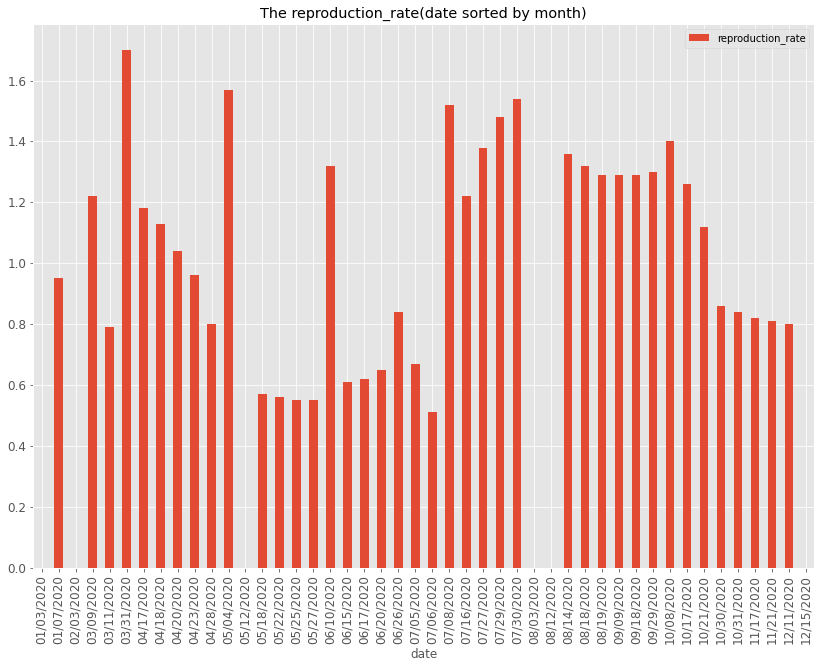

In [79]:
from matplotlib.dates import DateFormatter
#get the reproduction rate , the index date comes by default
tc= ddf[['reproduction_rate']]
# the problem is that if I plot now i get a very mashed up plot
# so I need to only get a sample , but first I need to sort the date index column by month, because I want the plot to be over the year
# Convert the date index column to datetime
ddf.index = pd.to_datetime(ddf.index)
# then formate the index date to month day year
tc.index = ddf.index.strftime('%m/%d/%Y')
# now take a sample looks like per week = .15
rows = tc.sample(frac = .15)
# but I need to sort , that why I changed the format, because the sort will sort on the first date at index [0].
rows.sort_index()
sort1 = rows.sort_values(by=['date'])
# now plot the result
my_tcVsRr=sort1.plot(kind='bar',rot=90,fontsize=12,title="The reproduction_rate(date sorted by month)",grid=True)

The above figure shows the reproduction rate. The reproduction rate or R number basically put, it’s a way of measuring an infectious disease’s capacity to spread. The R number signifies the average number of people that one infected person will pass the virus to. The figure shows that for Ireland in the begining started a about 2.6 meaning that for every one person infected that 2.6 people will be infected as a result of that one person.

### New cases vs Lock down level

The plot below shows dataset the new_case vs the locklevel. The new cases that have been report but is not cumilivate per week and the locklevel is the level of restriction durning the week of the covid cases. The red line show the locklevel and the bar chart show the new_case reported to the world health orginisation. The index is set to week column. The red line superimposed on the barchart given visual represation of how the restriction has affected the contracting of covid 19. I can be seen that restrictions help to reducts the contraction of covid 19. No suprise there then. 

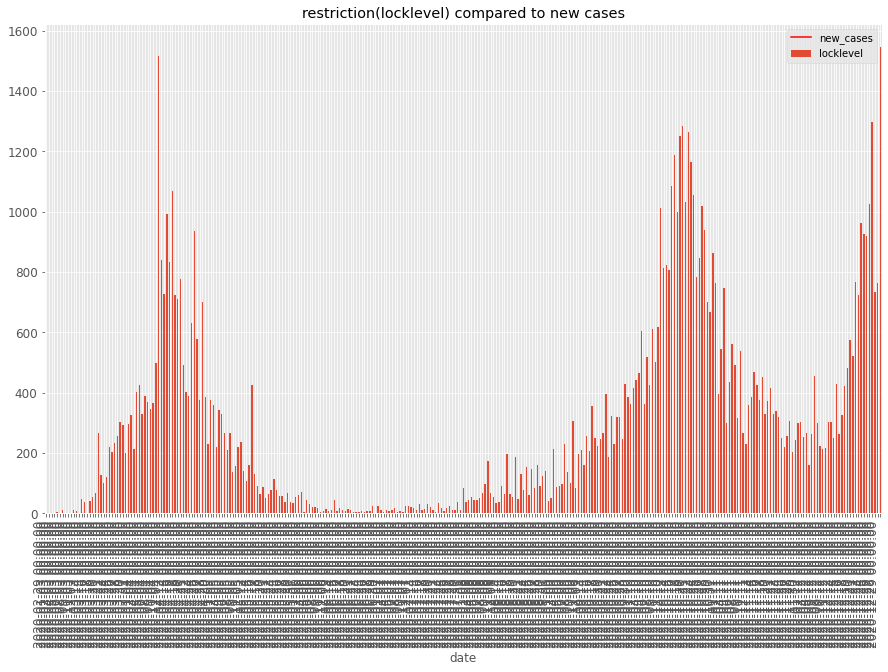

In [84]:
#get the columns new_cases and locklevel
close_arr = ddf['new_cases']
#to be able to compare the lock down level and the new cases the lock down level has been multiplyed by 200
close_arr1=ddf['locklevel'] * 200
#using pandas plot the data from the new_case and locklevel columns 
#first to be plotted is new_cases per week on a bar chart where the x axis label is rotated by 90 degrees
my_plot=close_arr.plot(kind='bar',figsize=(15,10),rot=90,fontsize=12,title="restriction(locklevel) compared to new cases",grid=True)
my_plot=close_arr1.plot(color="red",rot=90,grid=True)
my_plot.legend(["new_cases", "locklevel"]);

##### Get the mean median and mode

In [177]:
meanMedianMode(ddf["new_cases"],"new_cases")

NEW_CASES :
The mean is  269.65 
The Mode is  5.0 
And median is  168.5


Standard deviation

In [178]:
import statistics

std=statistics.stdev(ddf["new_cases"])
print('New Cases: Most of the values are within the range of {} from the mean value, which is {}'.format(std,261))

New Cases: Most of the values are within the range of 315.995257186089 from the mean value, which is 261


Prediction: K nearest. How many deaths potentailly will there be based on historical data.

In [179]:
input=ddf[["new_cases","total_cases"]]
output=ddf["new_deaths"]

In [180]:
knn=nel.KNeighborsClassifier(n_neighbors=5)

In [54]:
knn.fit(input,output);

The k nearest neighbour value predict the potental number of death

In [64]:
result = knn.predict([[346,500000]])

In [116]:
res = result[0]

In [117]:
print("Predicted Deaths: ",res)

Predicted Deaths:  7.0


Train the model

In [145]:
input_train,input_test,output_train,output_test = mod.train_test_split(input,output, test_size=0.33)

In [146]:
knm=nel.KNeighborsClassifier(n_neighbors=5)

In [147]:
knm.fit(input_train,output_train);

In [148]:
(knm.predict(input_test)== output_test).sum()

3

In [152]:
t_result = knm.predict(input_test)
print("Predicted Deaths array:",t_result,"\nPredicted Deaths: ",t_result[0])

Predicted Deaths array: [1. 5. 0. 5. 0. 0. 0. 0. 0. 0. 0. 5. 5. 5.] 
Predicted Deaths:  1.0


#### Linear Regression
To make Predictions of how many people could die of Covid 19 


In [9]:
# Import linear_model from sklearn.
import sklearn.linear_model as lm

In [10]:
# Create a linear regression model instance.
m = lm.LinearRegression()

In [7]:

#x=df[["speed","power"]]
#y=df["power"]
x=ddf[["new_cases","total_cases"]]
y=ddf["new_deaths"]

In [11]:
m.fit(x,y)

LinearRegression()

In [12]:
m.score(x,y)

0.20688254056477662

In [24]:
z = ddf['new_cases']
q = ddf['new_deaths']

In [25]:
np.polyfit(z,q,1)

array([0.01369462, 3.05724628])

In [26]:
m,c =np.polyfit(z,q,1)

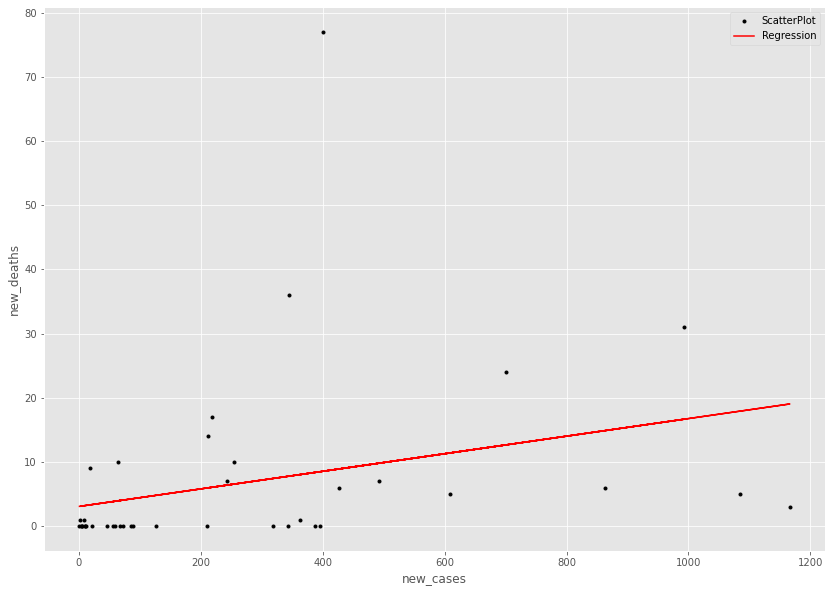

In [30]:
plt.plot(z, q, 'k.',label="ScatterPlot")
#y=ax**2+bx+c, quadratic 
plt.plot(z, m * z + c, 'r-',label="Regression")
plt.xlabel("new_cases")
plt.ylabel("new_deaths")
plt.legend(loc="best")

The above figure show the new case vs the new deaths. It would seem that if 800 new cases were to be found in ireland then, just over 10 new deaths would occur.

### Analysis of Deaths

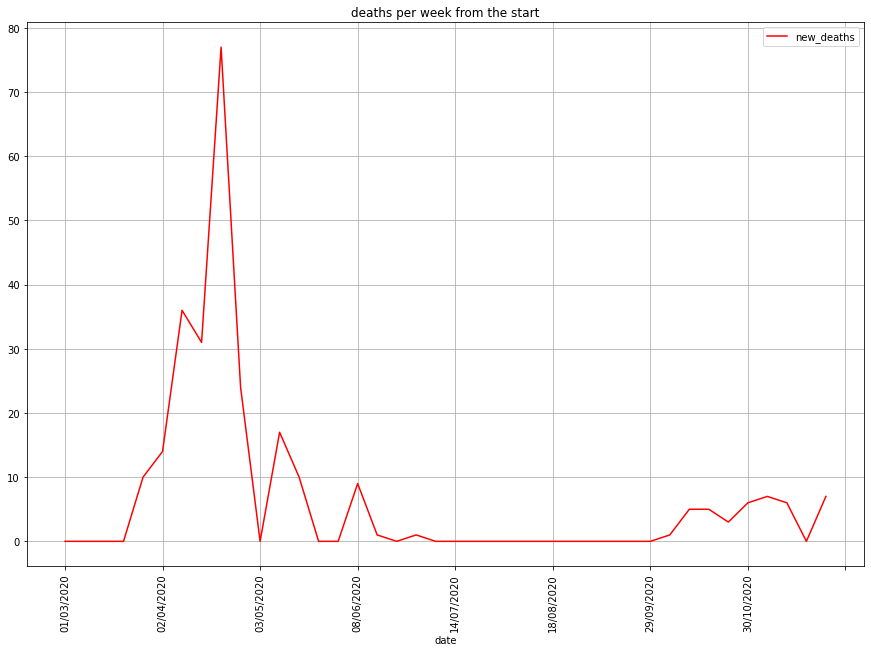

In [181]:
tds = ddf['total_deaths']
tdss=ddf['new_deaths']
#using pandas plot the data from the new_case and locklevel columns 
#first to be plotted is new_cases per week on a bar chart where the x axis label is rotated by 90 degrees
#my_plot=tds.plot(figsize=(15,10),rot=90,fontsize=12,color="blue")
my_plot=tdss.plot(color="red",rot=90,figsize=(15,10),title="deaths per week from the start",grid=True)
my_plot.legend(["new_deaths"]);

The figure above shows how many the deaths that have occured over the period march to december. The deaths spiked between 05-04-2020 and 10-05-2020. This is because there was an outbreak in nursing homes. ref(http://edepositireland.ie/handle/2262/92815)

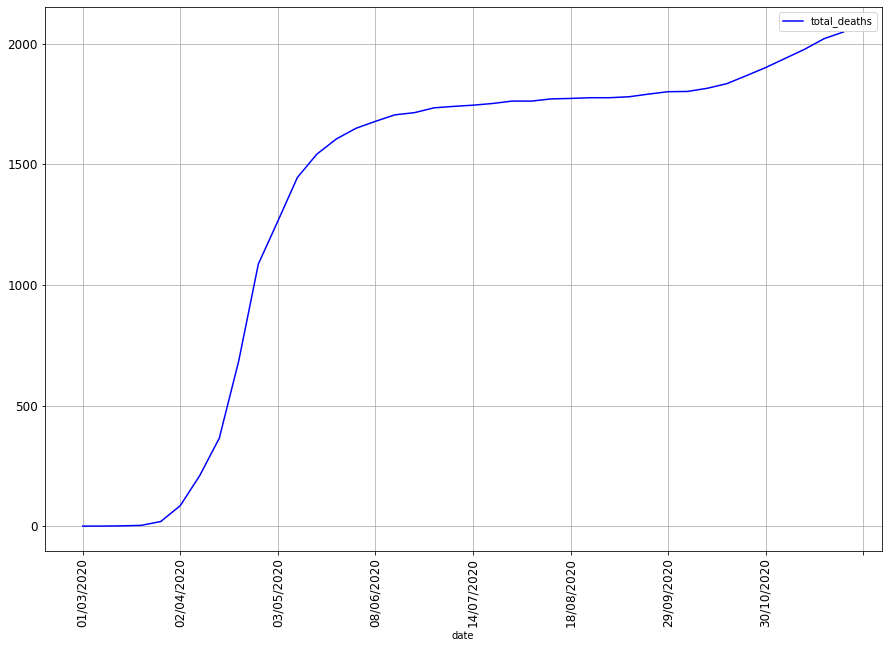

In [190]:
tds = ddf['total_deaths']
tdss=ddf['new_deaths']
#using pandas plot the data from the new_case and locklevel columns 
#first to be plotted is new_cases per week on a bar chart where the x axis label is rotated by 90 degrees
my_plot=tds.plot(figsize=(15,10),rot=90,fontsize=12,color="blue",grid=True)
#my_plot=tdss.plot(color="red",rot=90,figsize=(15,10),title="deaths per week from the start")
my_plot.legend(["total_deaths"]);

The figure above shows the total deaths per week since march to december. The total deaths a just over 2000.

In [182]:
meanMedianMode(ddf["new_deaths"],"new_deaths")

NEW_DEATHS :
The mean is  6.75 
The Mode is  0.0 
And median is  0.0


#### new_tests vs new_cases

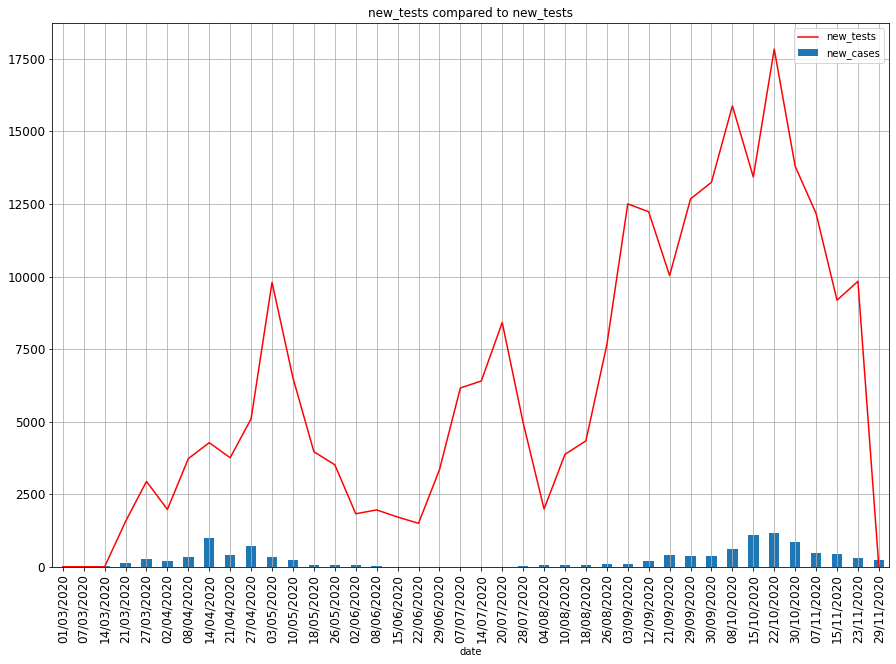

In [191]:
#get the columns new_test and new cases
close_arr = ddf['new_tests']
close_arr1=ddf['new_cases']
#using pandas plot the data 
my_plot=close_arr1.plot(kind='bar',figsize=(15,10),rot=90,fontsize=12,title="new_tests compared to new_tests",grid=True)
my_plot=close_arr.plot(color="red",rot=90,grid=True)
my_plot.legend(["new_tests", "new_cases"]);

It would seem that there is little or no corralation between the amount of test undertaken and the confirmed new cases per week.

To get a positive test how many tests were carried out.tests_per_case 

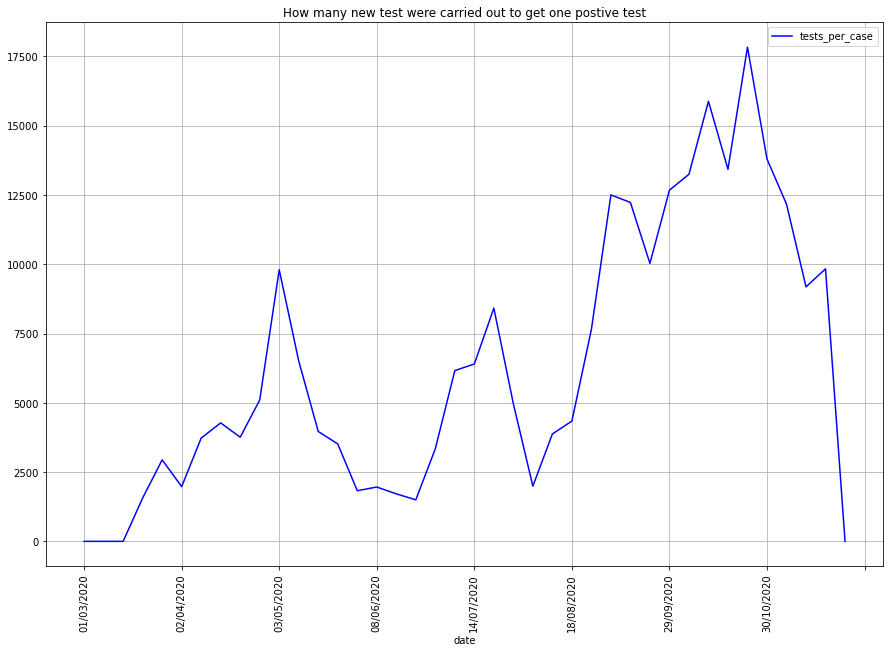

In [192]:
#get the columns new_test and new cases
#close_arr = df['new_tests']
close_arr1=ddf['tests_per_case']
#using pandas plot the data 
#my_plot=close_arr1.plot(kind='bar',figsize=(15,10),rot=90,fontsize=12,title="new_tests compared to new_tests",grid=True)
my_plot=close_arr.plot(color="blue",rot=90,grid=True,figsize=(15,10),title="How many new test were carried out to get one postive test")
my_plot.legend(["tests_per_case"]);

The figure above shows the amount of tests conducted to get a postive test in Ireland it can be seen that towards the end of 2020 that much more testing was conducted. 

### ICU patients Vs total cases

The analysis that the confirmed cases of covid 19 are based on the cases reported and that the test carried out were done because the individual showed the correct symptomes of covid 19 at the time.  

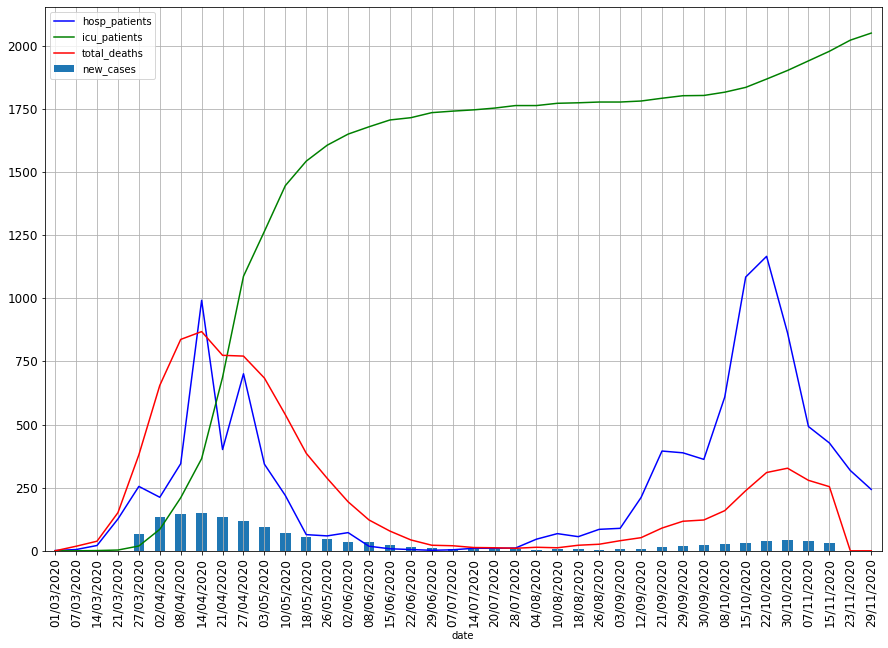

In [201]:
#get the columns new_test and new cases
close_arr = ddf['hosp_patients']
close_arr1=ddf['icu_patients']
close_arr2=ddf['total_deaths']
close_arr3=ddf['new_cases']

#using pandas plot the data
my_plot=close_arr3.plot(color='blue',figsize=(15,10),rot=90,title="")
my_plot=close_arr2.plot(color="green",figsize=(15,10),rot=90,title="")
my_plot=close_arr1.plot(kind='bar',figsize=(15,10),rot=90,fontsize=12,title="",grid=True)
my_plot=close_arr.plot(color="red",rot=90,grid=True,figsize=(15,10),title="")
my_plot.legend(["hosp_patients","icu_patients","total_deaths","new_cases"]);

The above figure shows patients in hosiptal , icu patients and total deaths. While there is a corralation between icu patients and patient in hostiptal its unclear if there is deaths associated to patients in hosiptal. 